#### APIs

- Application Programming Interface
- set of Protocols and Routines for Building / interacting with software applications
- aka. it allows and/or defines software programs to communicate with each other
- a way to get data from an application without knowing the databases structure
- provides an end-point for requests to be sent to

##### JSONs

- a standard form for transfering data through APIs
- JavaScript Object Notation
- arose out of a need for real-time server-to-browser communication

- JSON consists of NAME-VALUE pairs SEPARATED by Commas
- this is similar to a dictionary in python
- as a result when loading JSON in Python, it is natural to store them in a dictionary

- not tabular
- common web data format
- organized into collections of objects
- objects are collections of attribute-value pairs (hence why similar to a dictionary)
- nested JSON: objects within objects

- many different types of orientations could occur with JSON

#### Reading JSONs from a file

In [ ]:
import pandas as pd
data = pd.read_json("jsonfilename.json",
                   orient = "split")

##### keys

- will always be STRINGS enclosed in quotations marks

##### values

- can be strings, integers, arrays, or even objects
- such an object can even be a JSON and then you have nested JSONs

##### loading JSON from local directory

In [ ]:
import json

with open('filename.json', 'r') as json_file:
    json_data = json.load(json_file)
    
#checking to see that json is imported as a dictionary type
type(json_data)

In [ ]:
# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

##### connecting to an API

In [ ]:
import requests

url = 'website-url'
r = requests.get(url)

#response object has a json decoder and returns a dictionary
json_data = r.json()

#can pull the dictionary to see what's been pulled
for key, value in json_data.items():
    print(key + ':', value)

URL request for API connection
- "http" - indicates an HTTP request is being made
- "www.omdbapi.com" - querying the OMDB API, for example
- "?t=hackers" - query string that makes the query
    - in this case: returns the data for a move with title (t) 'Hackers'

Where can this information about the api url be found?
- documentation such as this can usually be found on the API website

Example:
- API Domain: http://www.omdbapi.com
- Query String, two arguments:
    - apikey=72bc447a
    - t=the+social+network
    
Combined:
- http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network

##### working with Nested Data

example:
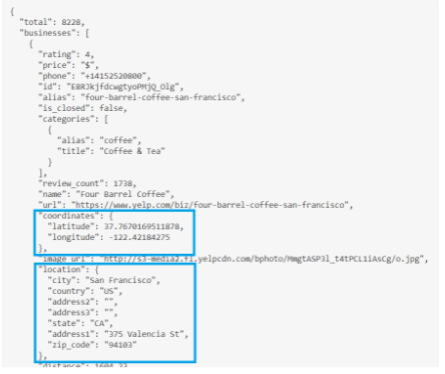

##### pandas.io.json

- submodule that has tools for reading and writing JSON
- needs its own "import" statement, explicitly
- json_normalize - returns a flattened dataframe

##### loading Nested JSON data

In [ ]:
import pandas as pd
import requests

from pandas.io import json_normalize

#set up headers, parameters, and API endpoint
#set up the url string
api_url = "http://api.yelp.com/v3/businesses/search"

#setup parameter dictionary according to documentatino
params = {"term": "bookstore",
         "location": "San Francisco"}

#set up header dictionary w/ API key (according to documentation)
headers = {"Authorization": "Bearer {}".format(api_key)}

#pass to requests.get()
response = requests.get(api_url,
                       params = params,
                       headers = headers)

data = respons.json()

#flatten data and load to dataframe with _separators
df = json_normalize(data["businesses"], sep="_")